# Master M3IR
# Classification de visages par regression logistique et ACP




In [1]:
# Initialisations
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

## Données

On va utiliser des images en niveau de gris de visages, 

> Grayscale faces 8 bit `[0-255]`, a few images of several different people.
> 400 total images, 64x64 size.
> From the Olivetti database at ATT.

Fichier à télécharger: [olivettifaces.mat](http://www-l2ti.univ-paris13.fr/~viennet/ens/AFDV/data/olivettifaces.mat) (4,1Mo).

Le format est un peu spécial, il s'agit d'une matrice matlab. On va le lire comme suit:

In [2]:
D = scipy.io.loadmat('olivettifaces.mat') # modifier chemin si nécessaire
# La matrice est transposée (lignes/colonnes):
X = D['faces'].transpose()
print(X.shape)

(400, 4096)


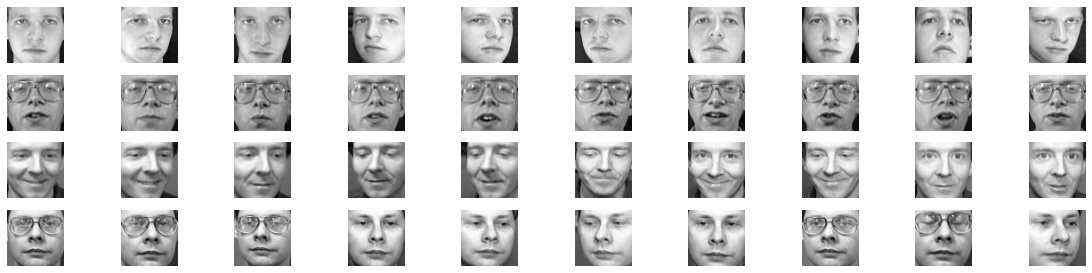

In [3]:

# Affichage de quelques exemples:
plt.figure(figsize=(20,6))
N = 40 # nombre d'exemples à afficher
MaxNbPerLine = 10 

nrows = N // MaxNbPerLine + 1 
ncols = min(N, MaxNbPerLine)
index = 1 # indice dans la figure
for image in X[:N,:]:
    plt.subplot(nrows, ncols, index)
    plt.axis('off')    
    plt.imshow(image.reshape((64,64)).transpose(), cmap=plt.cm.gray)
    index += 1


On voit qu'on a dix images de chaque personne, dans l'ordre. Chaque image est de taille 64x64 = 4096 pixels.


## Image moyenne
Convertir les images en float, calculer et afficher l'image moyenne.

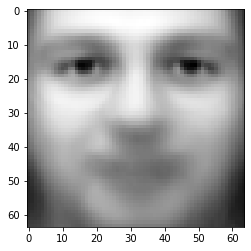

In [4]:
X = X.astype('float64')
image_moyenne = np.mean(X,axis=0)
plt.imshow(image_moyenne.reshape((64,64)).transpose(), cmap=plt.cm.gray)


## Analyse en composantes principales
Calculer une ACP pour projeter les images en deux dimensions et afficher les images dans le plan.

In [5]:
# Réponse (utiliser plusieurs cellules)

from sklearn.decomposition import PCA
X_center = X - image_moyenne
pca = PCA(n_components=2)
pca.fit(X_center)
coords = pca.transform(X_center)



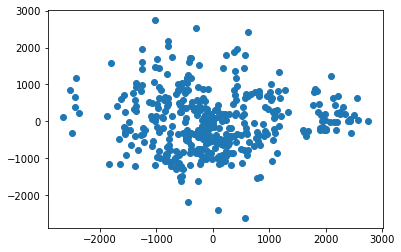

In [6]:
# Afficher les images dans le plan
# Plot
plt.scatter(coords[:,0], coords[:,1])
plt.show()

## Classification

Estimer un modèle de classification par régression logistique. Le modèle sera estimé (appris) sur 7 visages par personne, et testé sur les 3 images restantes.

On pourra s'inspirer de l'[exemple de la documentation](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html)

Quelle est la personne sur laquelle le modèle commet le plus d'erreurs ?

In [11]:
from sklearn.linear_model import LogisticRegression

# Données d'entrainement

X_train = np.zeros((280,4096))
Y_train = np.zeros((280))

for i in range(40):
    X_train[i*7:(i+1)*7,:] = X[i*10:i*10 +7,:]

for i in range(40):
    Y_train[i*7:(i+1)*7]=i



# Données de Test

Y_test = np.zeros((120))
X_test = np.zeros((120,4096))

for i in range(40):
    X_test[i*3:(i+1)*3,:] = X[((i+1)*10)-3: (i+1)*10,:]

for i in range(40):
    Y_test[i*3:(i+1)*3]=i


In [12]:
logisticRegr = LogisticRegression(C=1e5)
logisticRegr.fit(X_train, Y_train)

LogisticRegression(C=100000.0)

In [13]:
Y_predict=logisticRegr.predict(X_test)
print(Y_predict)


[ 0.  0. 37.  1.  1.  1.  2.  2.  2.  3.  3. 38. 34.  4.  5.  5.  5.  5.
  6.  6.  6.  7.  0.  7.  8.  8. 22.  9. 39.  0. 10. 10. 10. 37. 39. 11.
  0. 20. 12. 13. 13. 13. 14. 14. 14. 23. 15. 15. 16. 16. 16. 17. 17. 17.
 18. 18. 18. 19. 19. 19. 20. 20. 20. 21. 21. 21. 22. 12. 20. 23. 23. 23.
 34. 24. 24. 25. 25. 24. 26. 26. 26. 27. 27. 27. 28. 34. 28. 29. 29. 29.
 30. 30. 30.  6. 31. 31. 32. 32. 32. 33. 33. 33. 34. 34. 34. 35. 23.  6.
 36. 36. 36. 37. 37. 37. 38. 38. 38. 39. 39. 39.]


In [14]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, Y_test)
print(score)

0.825


Les personnes sur lesquelles le modèle commet le plus d'erreurs sont : 4,9,11,12,22,35
